# Quadratic Discrimant Analysis (QDA)
2 classes

In [1]:
from os import system
import numpy as np
import pandas as pd
import scipy.optimize as op
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from scipy.stats import norm
from scipy.stats import multivariate_normal

<H1>Read Data from CSV

In [2]:
dfTrain = pd.read_csv('../input/ClassificationDS/ClassificationData.csv')   #Training Dataset
dfTrain.head()

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
DistinctClasses=np.array(dfTrain['Y'].unique())
print(DistinctClasses)

[0 1]


<h5> Visualize Data

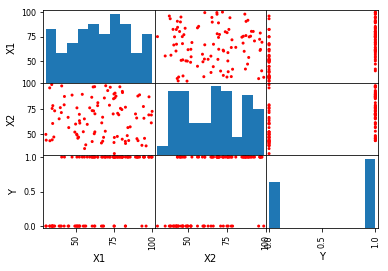

In [4]:
pd.plotting.scatter_matrix(dfTrain, alpha=1, diagonal='hist',color='r')
plt.show()

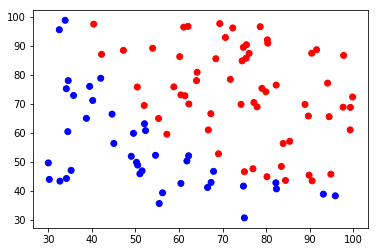

In [5]:
cmap = ListedColormap(['blue', 'red']) 



plt.scatter(dfTrain.loc[:,['X1']].values,dfTrain.loc[:,['X2']].values, c=dfTrain.loc[:,['Y']].values, cmap=cmap)
plt.show()

<h2>Extract Input Feature to <b>X </b>and Label to <b>Y</b></h2>
<h5>X=(X1 &amp; X2 in DS) and Y(Class in DS)   

In [6]:
def extractFeatures(df):
    df_Features=df.iloc[:,0:2]
    df_Label=df.iloc[:,2:3]
    X=df_Features.values
    Y=df_Label.values
    return X,Y

In [7]:
X,Y=extractFeatures(dfTrain)

In [8]:
def QDAClassifier(Xtrain,XClass,Xtest):

    M0=np.mean(Xtrain[np.where(XClass==0)[0]],axis=0)
    M1=np.mean(Xtrain[np.where(XClass==1)[0]],axis=0)
    
    
    CV0=np.cov(Xtrain[np.where(XClass==0)[0]][:,0],Xtrain[np.where(XClass==0)[0]][:,1],ddof=1)
    CV1=np.cov(Xtrain[np.where(XClass==1)[0]][:,0],Xtrain[np.where(XClass==1)[0]][:,1],ddof=1)

    PI0=(len(np.where(XClass==0)[0])/len(XClass))
    PI1=(len(np.where(XClass==1)[0])/len(XClass))

    
    Mu0=[[M0[0]], [M0[1]]]
    Mu1=[[M1[0]],[M1[1]]]
    

   
    D0=np.linalg.det(CV0)
    D1=np.linalg.det(CV1)

    Z0=np.linalg.inv(CV0)
    Z1=np.linalg.inv(CV1)
    #Class 0

   


   
   
  


    Ytest=np.zeros((Xtest.shape[0],1))
  
    for i in range(len(Xtest[:,0:1])): 
        X=Xtest[i]
        X=X.reshape(2,1)

        T0=np.matmul(np.matmul(np.transpose(np.subtract(X,Mu0)),Z0),np.subtract(X,Mu0))
        T1=np.matmul(np.matmul(np.transpose(np.subtract(X,Mu1)),Z1),np.subtract(X,Mu1))
        DS0=-0.5*T0+np.log(PI0)-0.5*np.log(D0)
        DS1=-0.5*T1+np.log(PI1)-0.5*np.log(D1)
  


        if (DS1>DS0):
            Ytest[i]=1
        
    return Ytest

def LDAClassifier(Xtrain,XClass,Xtest):

    M0=np.mean(Xtrain[np.where(XClass==0)[0]],axis=0)
    M1=np.mean(Xtrain[np.where(XClass==1)[0]],axis=0)
    S0=np.std(Xtrain[np.where(XClass==0)[0]],axis=0,ddof=1)
    S1=np.std(Xtrain[np.where(XClass==1)[0]],axis=0,ddof=1)
    V0=np.var(Xtrain[np.where(XClass==0)[0]],axis=0,ddof=1)
    V1=np.var(Xtrain[np.where(XClass==1)[0]],axis=0,ddof=1)
    
    CV0=np.cov(Xtrain[np.where(XClass==0)[0]][:,0],Xtrain[np.where(XClass==0)[0]][:,1],ddof=1)
    CV1=np.cov(Xtrain[np.where(XClass==1)[0]][:,0],Xtrain[np.where(XClass==1)[0]][:,1],ddof=1)

    PI0=(len(np.where(XClass==0)[0])/len(XClass))
    PI1=(len(np.where(XClass==1)[0])/len(XClass))

    CV0=PI0*CV0
    CV1=PI1*CV1
    Mu0=[[M0[0]], [M0[1]]]
    Mu1=[[M1[0]],[M1[1]]]
    Zigma=CV0+CV1
    Zinv=np.linalg.inv(Zigma)

    #Class 0
    Coeff=(-1/2)*  np.matmul(np.transpose(Mu0),Zinv)
    Coeff=np.matmul(Coeff,Mu0)+np.log(PI0)
    DS0=np.matmul(np.matmul(Xtest,Zinv),Mu0)
    DS0=DS0+Coeff

    Coeff=(-1/2)*  np.matmul(np.transpose(Mu1),Zinv)
    Coeff=np.matmul(Coeff,Mu1)+np.log(PI1)
    DS1=np.matmul(np.matmul(Xtest,Zinv),Mu1)
    DS1=DS1+Coeff


    Ytest=np.zeros((Xtest.shape[0],1))
  
    for i in range(len(Xtest[:,0:1])): 
        
        if (DS1[i]>DS0[i]):
            Ytest[i]=1
        
    return Ytest



<h1> Prediction/Accuracy Evaluation

<h5>Accurracy on Training Data

In [9]:
def accurracy(Y1,Y2):
    m=np.mean(np.where(Y1==Y2,1,0))    
    return m*100

<h3>Predict using QDA Classifier

In [10]:
K=25
pY=QDAClassifier(X,Y,X) 
print(accurracy(Y, pY))

90.0


<h1>Plotting Hypothesis

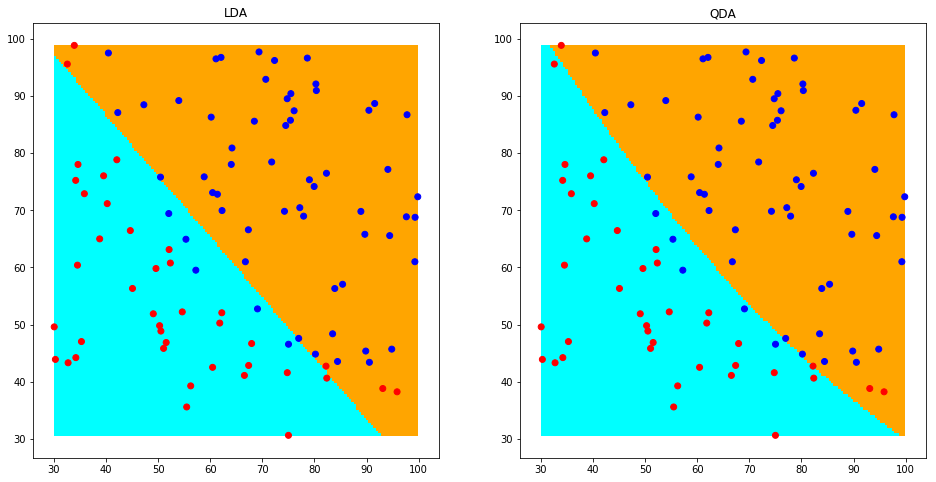

In [21]:
cmap_light = ListedColormap(['cyan', 'orange'])
cmap_bold = ListedColormap(['red', 'blue'])




x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
u = np.linspace(x_min, x_max,150) 
v = np.linspace(y_min, y_max,150) 
m=(len(u)*len(v))
U,V=np.meshgrid(u,v)
u=U.reshape((m,1))
v=V.reshape((m,1))
NewX=np.column_stack((u,v))


plt.figure(figsize=(16,8))

plt.subplot(121)
plt.title("LDA")
Newy=LDAClassifier(X,Y,NewX)  

plt.pcolormesh(U,V,Newy.reshape(U.shape),cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], cmap=cmap_bold)


plt.subplot(122)
plt.title("QDA")
Newy=QDAClassifier(X,Y,NewX)  
plt.pcolormesh(U,V,Newy.reshape(U.shape),cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], cmap=cmap_bold)
plt.show()